In [309]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler , MinMaxScaler
import time

import numpy as np
from numpy import zeros, newaxis
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , LSTM , Dropout

t_0 = time.time()
data = pd.read_csv (r'train.csv') #,nrows=1000000
t_1 = time.time()
print(f'Time : {t_1-t_0}')

Time : 98.36241316795349


In [310]:
training_data = data[data['investment_id']<1200]
test_data = data[(data['investment_id']>=1200) & (data['investment_id']<=1500)]

training_data = training_data.drop(['row_id' , 'time_id' , 'investment_id' , 'target'], axis=1)
test_data = test_data.drop(['row_id' , 'time_id' , 'investment_id' , 'target'], axis=1)
training_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

In [311]:
#scaler = StandardScaler()
#training_data = scaler.fit_transform(training_data)
#training_data.shape[1]

In [312]:
x_train = []
y_train = []

In [313]:
for j in range(training_data.shape[0]):
    for i in range(299,training_data.shape[1]):
        x_train.append(training_data.loc[j][i-299:i])
        y_train.append(training_data.loc[j][i])

In [314]:
x_train , y_train = np.array(x_train) , np.array(y_train)
x_train = x_train[:, newaxis, :]

In [315]:
x_train.shape , y_train.shape , type(x_train) , type(y_train)

((322150, 1, 299), (322150,), numpy.ndarray, numpy.ndarray)

In [316]:
regressior = Sequential()
               
regressior.add(LSTM(units = 50, activation = 'sigmoid', return_sequences = True, input_shape=(x_train.shape[1:])))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 60, activation = 'sigmoid', return_sequences = True))
regressior.add(Dropout(0.3))

regressior.add(LSTM(units = 80, activation = 'sigmoid', return_sequences = True))
regressior.add(Dropout(0.4))

regressior.add(LSTM(units = 120, activation = 'sigmoid', ))
regressior.add(Dropout(0.5))

regressior.add(Dense(units = 1))

In [317]:
regressior.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_65 (LSTM)               (None, 1, 50)             70000     
_________________________________________________________________
dropout_64 (Dropout)         (None, 1, 50)             0         
_________________________________________________________________
lstm_66 (LSTM)               (None, 1, 60)             26640     
_________________________________________________________________
dropout_65 (Dropout)         (None, 1, 60)             0         
_________________________________________________________________
lstm_67 (LSTM)               (None, 1, 80)             45120     
_________________________________________________________________
dropout_66 (Dropout)         (None, 1, 80)             0         
_________________________________________________________________
lstm_68 (LSTM)               (None, 120)             

In [318]:
regressior.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [319]:
t_0 = time.time()
regressior.fit(x_train, y_train, epochs=10, batch_size=32)
t_1 = time.time()
print(f'Time : {t_1-t_0}')

Epoch 1/10
10068/10068 [==============================] - 132s 13ms/step - loss: 0.3305
Epoch 2/10
10068/10068 [==============================] - 133s 13ms/step - loss: 0.2614
Epoch 3/10
10068/10068 [==============================] - 132s 13ms/step - loss: 0.2417
Epoch 4/10
10068/10068 [==============================] - 132s 13ms/step - loss: 0.2278
Epoch 5/10
10068/10068 [==============================] - 132s 13ms/step - loss: 0.2241
Epoch 6/10
10068/10068 [==============================] - 132s 13ms/step - loss: 0.2171
Epoch 7/10
10068/10068 [==============================] - 132s 13ms/step - loss: 0.2094
Epoch 8/10
10068/10068 [==============================] - 132s 13ms/step - loss: 0.2062
Epoch 9/10
10068/10068 [==============================] - 133s 13ms/step - loss: 0.2028
Epoch 10/10
10068/10068 [==============================] - 132s 13ms/step - loss: 0.1979
Time : 1326.8864064216614


In [320]:
x_test = []
y_test = []

In [321]:
for j in range(test_data.shape[0]):
    for i in range(299,test_data.shape[1]):
        x_test.append(test_data.loc[j][i-299:i])
        y_test.append(test_data.loc[j][i])

In [322]:
x_test , y_test = np.array(x_test) , np.array(y_test)
x_test = x_test[:, newaxis, :]

In [323]:
x_test.shape , y_test.shape , type(x_test) , type(y_test)

((77287, 1, 299), (77287,), numpy.ndarray, numpy.ndarray)

In [324]:
y_pred = regressior.predict(x_test)

In [325]:
def graph(list):
    graph = []
    for i in range(len(list)):
        if i == 0:
            graph.append(list[0])
        else:
            graph.append(graph[-1]+list[i])
    return(graph)

In [326]:
y_pred = list(y_pred)
y_test = list(y_test)

In [327]:
y_test_graph = graph(y_test)
y_pred_graph = graph(y_pred)

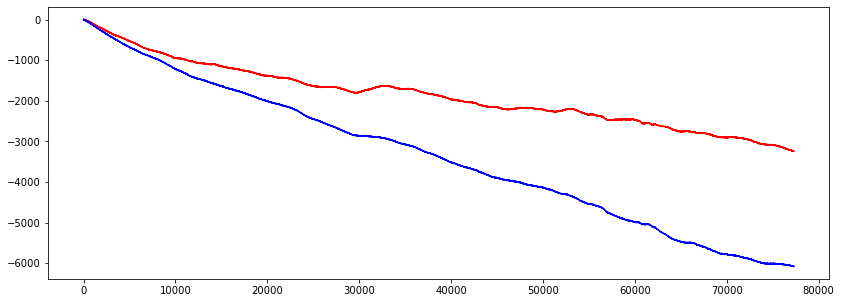

In [328]:
plt.figure(figsize=(14,5))
plt.plot(y_test_graph,color='red')
plt.plot(y_pred_graph,color='blue')
plt.show()

In [329]:
error = []
for i in range(len(y_pred)):
    err = abs(y_pred[i]-y_test[i])
    error.append(err)
f_error = sum(error)/len(y_pred)
print(f_error)

[0.22681276]
